In [1]:
import numpy as np
import matplotlib.pyplot as plt

Değerler:
 b0:41.31577715355805 
b1:3.618679775280899


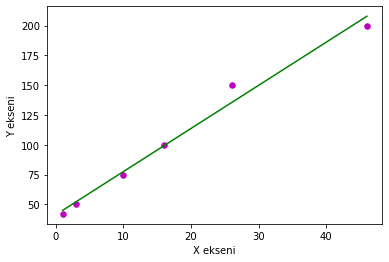

In [2]:
def katsayi_bul(x,y):
    #x bağımsız değişken sayısı
    n=np.size(x)
    
    #x ve y nin ortalamalar
    x_ort,y_ort=np.mean(x),np.mean(y)
    
    #x'in kareler toplamı ve x*y toplamı
    SS_xy=np.sum(y*x)-n*x_ort*y_ort
    SS_xx=np.sum(x*x)-n*x_ort*x_ort
    
    #katsayi hesapla
    b1=SS_xy/SS_xx
    b0=y_ort-b1*x_ort
    
    return(b0,b1)

def grafik_ciz(x,y,a):
    plt.scatter(x,y,color="m",marker="o",s=30)
    
    y_tahmin=a[0]+a[1]*x
    
    plt.plot(x,y_tahmin,color="g")
    plt.xlabel("X ekseni")
    plt.ylabel("Y ekseni")
    plt.show()
    
def main():
    x=np.array([1,3,10,16,26,46])
    y=np.array([42,50,75,100,150,200])
    a=katsayi_bul(x,y)
    print("Değerler:\n b0:{} \nb1:{}".format(a[0],a[1]))
    grafik_ciz(x,y,a)

if __name__ == "__main__":
    main()
    

In [3]:
from sklearn.linear_model import LinearRegression
X=np.array([1,3,10,16,26,46]).reshape(-1,1)
y=np.array([42,50,75,100,150,200])

In [4]:
model=LinearRegression().fit(X,y)

In [5]:
model.intercept_

41.31577715355802

In [6]:
model.coef_

array([3.61867978])

In [7]:
model.predict([[15]])

array([95.59597378])

In [8]:
import pandas as pd
df=pd.read_csv("salary_data.csv")

In [9]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [13]:
X=df[["YearsExperience"]]

In [15]:
X.head(10)

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [17]:
y=df[["Salary"]]

In [18]:
model=LinearRegression().fit(X,y)

In [19]:
model

LinearRegression()

In [20]:
model.intercept_#sabit b0 değeri

array([25792.20019867])

In [21]:
model.coef_#b1 değeri

array([[9449.96232146]])

In [22]:
#rkare
model.score(X,y)#bağımlı değişkendeki değişikliğin,bağımsız değişkenlerce açıklanma yüzdesi

0.9569566641435086

In [26]:
model.predict([[7.3]])

array([[94776.92514529]])

In [25]:
model.predict(X)[0:6]#model tahmin değeri

array([[36187.15875227],
       [38077.15121656],
       [39967.14368085],
       [44692.12484158],
       [46582.11730587],
       [53197.09093089]])

In [27]:
tahmin_y_degerleri=pd.DataFrame(model.predict(X)[0:10])

In [28]:
tahmin_y_degerleri

,0
0,36187.158752
1,38077.151217
2,39967.143681
3,44692.124842
4,46582.117306
5,53197.090931
6,54142.087163
7,56032.079627
8,56032.079627
9,60757.060788


In [29]:
gercek_y_degerleri=y[0:10]

In [30]:
gercek_y_degerleri

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [31]:
df_hata=pd.concat([gercek_y_degerleri,tahmin_y_degerleri],axis=1)

In [32]:
df_hata

,Salary,0
0,39343,36187.158752
1,46205,38077.151217
2,37731,39967.143681
3,43525,44692.124842
4,39891,46582.117306
5,56642,53197.090931
6,60150,54142.087163
7,54445,56032.079627
8,64445,56032.079627
9,57189,60757.060788


In [33]:
df_hata.columns=["Gerçek Y Değerleri","Tahmin Y Değerleri"]

In [34]:
df_hata

,Gerçek Y Değerleri,Tahmin Y Değerleri
0,39343,36187.158752
1,46205,38077.151217
2,37731,39967.143681
3,43525,44692.124842
4,39891,46582.117306
5,56642,53197.090931
6,60150,54142.087163
7,54445,56032.079627
8,64445,56032.079627
9,57189,60757.060788


In [35]:
df_hata["Mevcut Hata"]=df_hata["Gerçek Y Değerleri"]-df_hata["Tahmin Y Değerleri"]

In [36]:
df_hata

,Gerçek Y Değerleri,Tahmin Y Değerleri,Mevcut Hata
0,39343,36187.158752,3155.841248
1,46205,38077.151217,8127.848783
2,37731,39967.143681,-2236.143681
3,43525,44692.124842,-1167.124842
4,39891,46582.117306,-6691.117306
5,56642,53197.090931,3444.909069
6,60150,54142.087163,6007.912837
7,54445,56032.079627,-1587.079627
8,64445,56032.079627,8412.920373
9,57189,60757.060788,-3568.060788


In [37]:
df_hata["Hata Kareler"]=df_hata["Mevcut Hata"]**2

In [38]:
df_hata

,Gerçek Y Değerleri,Tahmin Y Değerleri,Mevcut Hata,Hata Kareler
0,39343,36187.158752,3155.841248,9.959334e+06
1,46205,38077.151217,8127.848783,6.606193e+07
2,37731,39967.143681,-2236.143681,5.000339e+06
3,43525,44692.124842,-1167.124842,1.362180e+06
4,39891,46582.117306,-6691.117306,4.477105e+07
5,56642,53197.090931,3444.909069,1.186740e+07
6,60150,54142.087163,6007.912837,3.609502e+07
7,54445,56032.079627,-1587.079627,2.518822e+06
8,64445,56032.079627,8412.920373,7.077723e+07
9,57189,60757.060788,-3568.060788,1.273106e+07


In [39]:
np.mean(df_hata["Hata Kareler"])

26114435.346420128

C:\Users\JFA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 129458.2868650309)

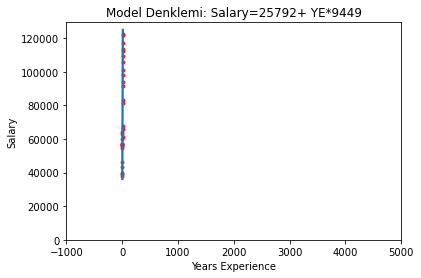

In [42]:
import seaborn as sns
graf=sns.regplot(df["YearsExperience"],df["Salary"],ci=None,scatter_kws={'color':'r','s':9})
graf.set_title("Model Denklemi: Salary=25792+ YE*9449")
graf.set_ylabel("Salary")
graf.set_xlabel("Years Experience")
plt.xlim(-1000,5000)
plt.ylim(bottom=0)